In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score
import matplotlib.pyplot as plt

In [ ]:
# Load the heart disease dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=names)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [ ]:
# Show the number of "?" values for each column
print(data.eq('?').sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [ ]:
# Preprocess the data
data = data.replace('?', np.nan) # replace '?' with NaN
data = data.astype(float) # convert all columns to float
imputer = SimpleImputer(strategy='median')
data = imputer.fit_transform(data)
data = pd.DataFrame(data, columns=names)
data['target'] = np.where(data['target'] > 0, 1, 0) # convert target values to binary
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
print(data.eq('?').sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Identify outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

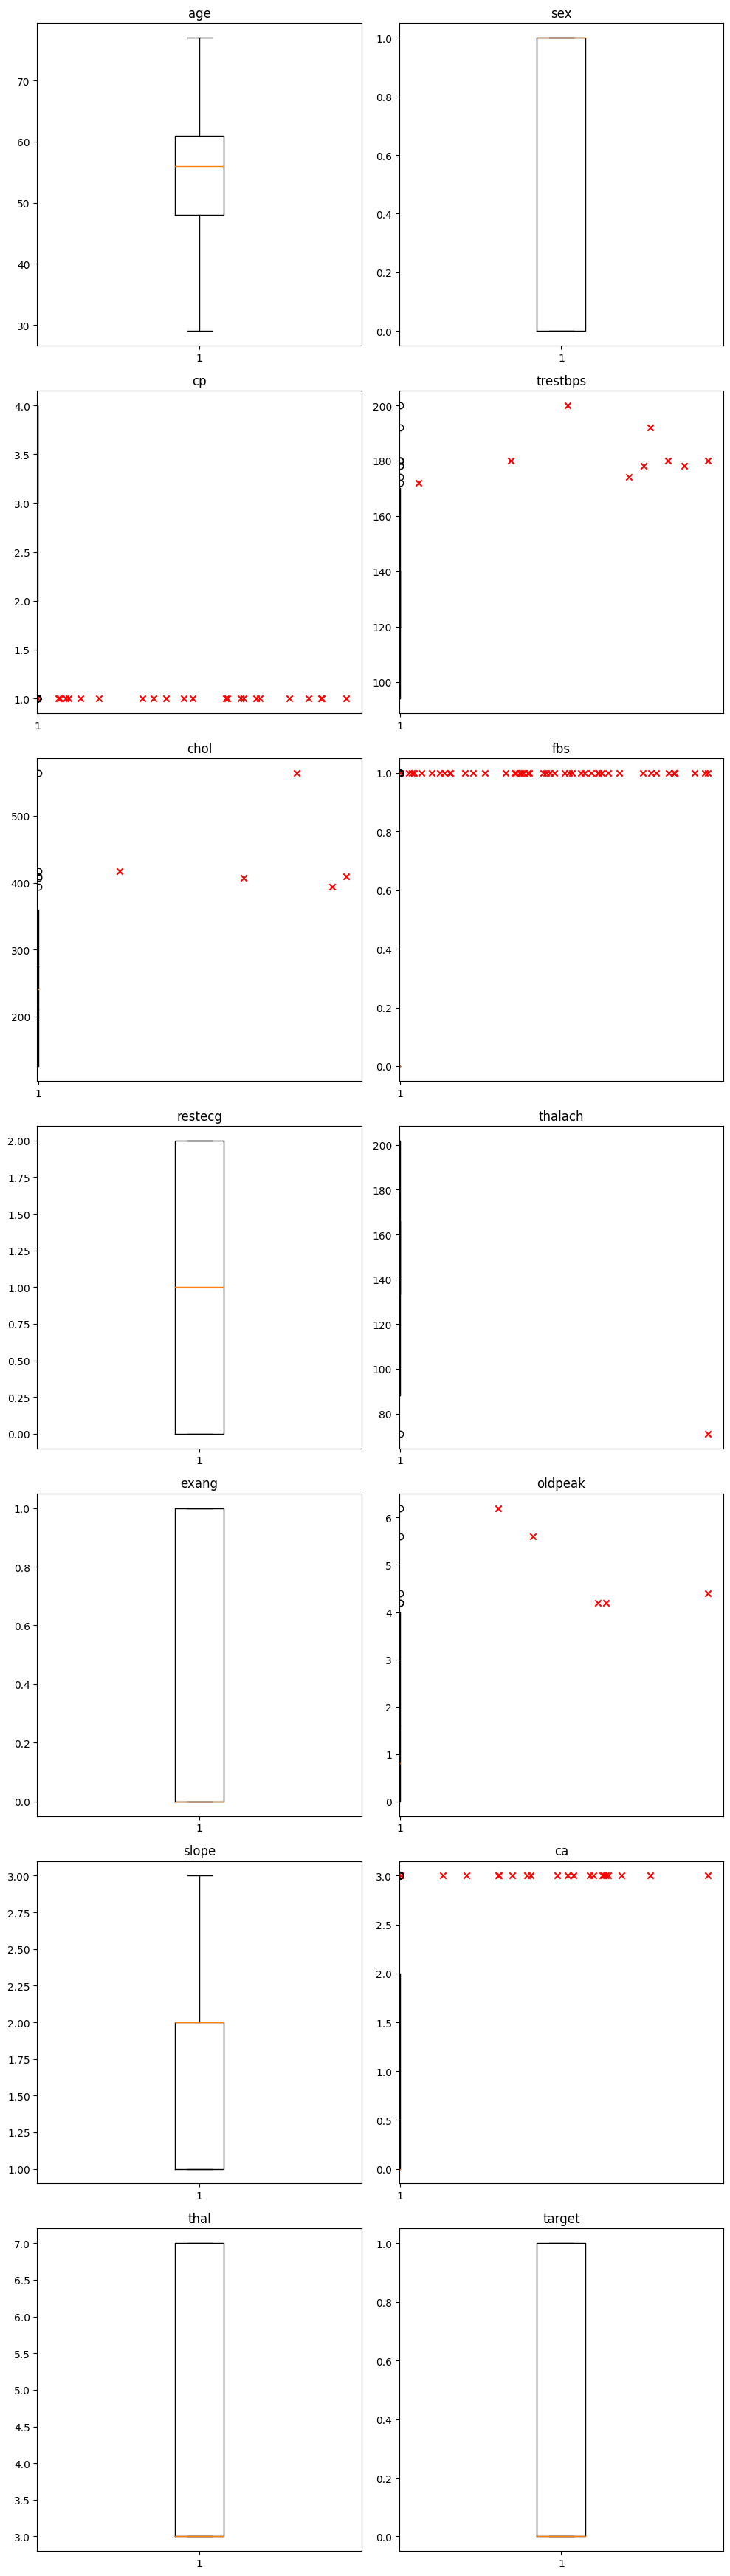

In [ ]:
# Create boxplots to display outliers
n_cols = len(data.columns)
n_rows = int(np.ceil(n_cols / 2))
fig, axs = plt.subplots(n_rows, 2, figsize=(10, n_rows * 5))
axs = axs.ravel()
for i, column in enumerate(data.columns):
    axs[i].boxplot(data[column])
    axs[i].set_title(column)
    if outliers[column].sum() > 0:
        axs[i].scatter(
            np.where(outliers[column])[0] + 1,
            data[column][outliers[column]],
            marker='x', color='r'
        )
    if i == n_cols - 1 and n_cols % 2 == 1:
        axs[i+1].set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
#from scipy.stats.mstats import winsorize
# Winsorize all columns in the dataframe
#for col in data.columns:
    #data[col] = winsorize(data[col], limits=[0.05, 0.05])

In [ ]:
#drop the outliers
data = data[~outliers.any(axis=1)]

In [ ]:
# Split the data into training and testing sets
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)


In [ ]:
kmeans.fit(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [ ]:
y_pred = kmeans.predict(X_test)


In [ ]:
# Silhouette score
silhouette = silhouette_score(X_test, y_pred)
print("Silhouette Score:", silhouette)
print(f'or, {silhouette:.2%}')

Silhouette Score: 0.37101989244202793
or, 37.10%


In [ ]:
# Completeness score
completeness = completeness_score(y_test, y_pred)
print("Completeness Score:", completeness)
print(f'or, {completeness:.2%}')

Completeness Score: 0.0007557877362168569
or, 0.08%
